Based on:

**BERT For Measuring Text Similarity**

https://towardsdatascience.com/bert-for-measuring-text-similarity-eec91c6bf9e1

*mean pooling operation*

"Each of those 512 tokens has a respective 768 values. This pooling operation will take the mean of all token embeddings and compress them into a single 768 vector space — creating a ‘sentence vector’."

In [1]:
! pip install sentence-transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Sentences

In [2]:
# import pandas as pd

# df = pd.read_csv( 
#     './datasets/sentences.csv',
#     encoding = 'UTF8',
#     sep = ';');
# df.head()

In [3]:
# df

In [4]:
# random_df = df.sample( frac=1 )

In [5]:
# random_df

In [6]:
# last_index_df_train = len( random_df ) / 3 * 2
# last_index_df_train = int(last_index_df_train)
# last_index_df_train

In [7]:
# df_train = randomDf.iloc[:last_index_df_train]
# len(df_train)

In [8]:
# df_train

In [9]:
# df_dev = randomDf.iloc[last_index_df_train:]
# len(df_dev)

In [10]:
# df_dev

Save the sub-datasets

In [11]:
# df_train.to_csv(
#     './datasets/sentences_train.csv', 
#     encoding = 'utf-8', 
#     index = False,
#     sep=';'
# )

In [12]:
# df_dev.to_csv(
#     './datasets/sentences_dev.csv', 
#     encoding = 'utf-8', 
#     index = False,
#     sep=';'
# )

In [13]:
import pandas as pd

df_train = pd.read_csv( 
    './datasets/sentences_train.csv',
    encoding = 'UTF8',
    sep = ';');
df_train

,book_id,review_id,review_rating,sentence
0,8595084742,R28DD7F6JEBWOG,5,"Enfim, o produto veio em perfeito estado e é a..."
1,8532606261,RLXU2DEXMYOWQ,2,Esperava mais do livro.
2,6580309318,R29058SOUWIVTU,5,"Livro fenomenal, muito bem escrito e uma narra..."
3,8573258926,R3ESAYVDKWMZ1C,1,Como peço o estorno?
4,8550807567,R3U5PQI3DGWZMR,4,É um livro que nos mostra vários exemplos prát...
...,...,...,...,...
117829,8580411971,R3NZYIP0YYGUJF,5,Tinha certeza que morreria mais jovem que o pa...
117830,8555340896,R34EDH1D3SLOQV,5,❤
117831,8501117846,R18HC9C592TXUS,4,"Porém, mesmo com essas duas alternativas ainda..."
117832,8545202210,R2VX6NXT46J9SV,5,"Chegou bem antes do prazo, muito bom"


In [14]:
len( df_train )

117834

In [15]:
# list( df_train['sentence'] )

In [16]:
# sentences = [
#     "Three years later, the coffin was still full of Jello.",
#     "The fish dreamed of escaping the fishbowl and into the toilet where he saw his friend go.",
#     "The person box was packed with jelly many dozens of months later.",
#     "He found a leprechaun in his walnut shell.",
#     "Undergraduate Topics in Computer Science (UTiCS) delivers high-quality instructional content for undergraduates studying in all areas of computing and information science.",
#     "This chapter will familiarize you with the framework we shall use throughout the book to think about the design and analysis of algorithms.",
#     "The U-shape observed in the test MSE curves (Figures 2.9–2.11) turns out to be the result of two competing properties of statistical learning methods.",
#     "The best place to start is with the topic that is most relevant to your employees: the knowledge and skill that they need to do their job.",
#     "What is the peak value of the distribution?",
#     "JOHNSON, D.S, ARAGON, C.R., McGEOCH, L.A. and SCHEVON, C. (1987). Optimization by Simulated Annealing: an Experimental Evaluation. USA: AT&T Bell Laboratories.",
#     "Each of these probabilities is between 0 and 1 inclusive, as it has to be to qualify as a probability.",
#     "As you’ve seen, you can spot plenty of problems just by looking over the data summaries.",
#     "Now let’s save the report with the name of Pubs Analysis Extended (save option is in the top left side of the report editor)."
# ]

# sentences = list( df_train['sentence'][:5000] )
sentences = list( df_train['sentence'][:30000] )
# sentences = list( df_train['sentence'] )

In [17]:
%%time

from sentence_transformers import SentenceTransformer

# model = SentenceTransformer('bert-base-nli-mean-tokens')
model = SentenceTransformer('neuralmind/bert-base-portuguese-cased')

Some weights of the model checkpoint at /root/.cache/torch/sentence_transformers/neuralmind_bert-base-portuguese-cased were not used when initializing BertModel: ['cls.seq_relationship.bias', 'cls.predictions.decoder.weight', 'cls.seq_relationship.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.dense.bias']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [18]:
%%time

sentences_embeddings = model.encode(sentences)

CPU times: user 25.8 s, sys: 1.33 s, total: 27.2 s
Wall time: 33.6 s


In [19]:
sentences_embeddings.shape

(30000, 768)

In [20]:
sentences_embeddings[0]

array([-3.58771384e-02, -3.41767073e-01,  2.28740409e-01,  3.72752212e-02,
        2.99620539e-01,  1.72355086e-01, -2.13794466e-02,  1.11645199e-01,
        1.05359375e-01, -3.84619802e-01, -6.88592419e-02,  4.62074637e-01,
       -7.02572390e-02, -2.43452072e-01, -9.80537981e-02, -2.57225782e-01,
        3.15951407e-01, -6.64627105e-02,  2.78897464e-01,  1.32522002e-01,
       -4.30028260e-01,  8.47638398e-02,  2.66941577e-01, -4.36485648e-01,
       -2.73169398e-01,  2.52864778e-01, -1.42650202e-01, -2.90078074e-01,
       -8.15785527e-02, -3.37487161e-01,  3.23663861e-01,  3.16599786e-01,
       -7.61704445e-02,  1.97163016e-01,  3.18889022e-01,  1.07750490e-01,
        1.14614472e-01,  4.44517523e-01, -1.05299897e-01,  9.10183787e-02,
        1.96558505e-01,  3.57577413e-01,  2.63024241e-01,  4.92352434e-02,
        2.13809773e-01, -5.69786966e-01,  2.10000068e-01, -2.14737192e-01,
       -2.32797146e-01, -5.61150551e-01,  2.22000778e-01, -1.73368931e-01,
       -4.05661434e-01,  

In [21]:
len( sentences_embeddings[0] )

768

We can find the most similar sentence using:

In [22]:
from sklearn.metrics.pairwise import cosine_similarity

In [23]:
cosine_similarity(
    [sentences_embeddings[0]],
    sentences_embeddings[1:]
)

array([[0.5343449 , 0.683019  , 0.5721272 , ..., 0.5666864 , 0.66642016,
        0.24553727]], dtype=float32)

In [24]:
print( f'0: {sentences[0]}' )
print( f'2: {sentences[2]}' )

0: Enfim, o produto veio em perfeito estado e é altamente recomendado por mim.
2: Livro fenomenal, muito bem escrito e uma narrativa cheia de significados e nuances.


K-Means

In [25]:
from sklearn.cluster import KMeans

In [26]:
clusters_total = 5

In [27]:
%%time

kmeans = KMeans(
    n_clusters = clusters_total, 
    random_state = 0)
kmeans.fit( sentences_embeddings )
kmeans

CPU times: user 19.3 s, sys: 3.65 s, total: 22.9 s
Wall time: 17.6 s


Visually evaluating the result.

In [28]:
from sklearn.manifold import TSNE
import seaborn as sns

In [29]:
%%time

tsne = TSNE(n_components=2)
tsne = tsne.fit_transform( sentences_embeddings )
tsne.shape

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


CPU times: user 7min 2s, sys: 7.47 s, total: 7min 10s
Wall time: 6min 31s


In [30]:
a = []
b = []
for item in tsne:
    # print(item[0])
    a.append( item[0] )
    b.append( item[1] )

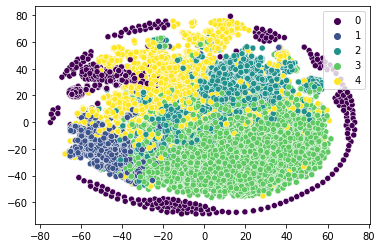

In [31]:
sns.scatterplot(
    x = a, 
    y = b,
    hue = kmeans.labels_,
    palette = 'viridis')

In [32]:
sentences[0]

'Enfim, o produto veio em perfeito estado e é altamente recomendado por mim.'

In [33]:
kmeans.labels_[0]

1

In [34]:
# sentences

['Enfim, o produto veio em perfeito estado e é altamente recomendado por mim.',
 'Esperava mais do livro.',
 'Livro fenomenal, muito bem escrito e uma narrativa cheia de significados e nuances.',
 'Como peço o estorno?',
 'É um livro que nos mostra vários exemplos práticos e simples para podermos mudar os hábitos.',
 'A autora nos oferece sua perspectiva de vida, conta um pouco de sua história e o faz de forma muito bonita.',
 'Ela gostou tanto do livro, que agora quer livros também, principalmente o nosso Harry.',
 'Muito bom',
 'Um tapa na cara em forma de conhecimento.',
 'Quatro pernas bom, duas pernas ruim',
 'Mas não pare só por aqui.',
 'Assim, temas tabus, como a humanidade do agressor, também são levantados.',
 'Odiei o livro, sério.',
 'Ótimo livro!',
 'A escrita é criativa e muito afetiva.',
 'Eu to apaixonada nesse box.',
 'Maravilhoso.',
 'O livro desde a capa até suas ultimas folhas é repleta de imagens ilustrativas e páginas com frases grifadas  ',
 'Capa dura, marca pag

In [35]:
# kmeans.labels_

array([1, 2, 2, ..., 3, 3, 0], dtype=int32)

In [36]:
labelled_df = pd.DataFrame()
labelled_df[ 'sentences' ] = sentences
labelled_df[ 'kmeans_label' ] = kmeans.labels_
labelled_df

,sentences,kmeans_label
0,"Enfim, o produto veio em perfeito estado e é a...",1
1,Esperava mais do livro.,2
2,"Livro fenomenal, muito bem escrito e uma narra...",2
3,Como peço o estorno?,3
4,É um livro que nos mostra vários exemplos prát...,3
...,...,...
29995,Gostei muito!,4
29996,,0
29997,Te prende do início ao fim.,3
29998,"Por fim, o livro sugere um plano de ação, que ...",3


K-Means Labels Distribution

In [37]:
labelled_df[ 'kmeans_label' ].value_counts()

3    14287
4     6060
2     5671
1     2780
0     1202
Name: kmeans_label, dtype: int64

In [83]:
def show_examples( label, sample = 20 ):

    df_temp = labelled_df[ labelled_df[ 'kmeans_label' ] == label]
    df_temp = df_temp.sample( n = sample )

    print( f'Examples from label: {label}' )
    print( '-------------------------------' )

    for index, item in enumerate( df_temp['sentences'] ):
        print( f'>>> {item}' )

    print()
    print( '======================================================================' )
    print()

In [79]:
labels = [ i for i in range(0, clusters_total) ]
labels

[0, 1, 2, 3, 4]

In [84]:
for label in labels:

    show_examples( label = label )

Examples from label: 0
-------------------------------
>>> 😍
>>> Jesus!
>>> tchau
>>> 👏🏾
>>> 😻
>>> pessoas
>>> Super
>>> na minha.
>>> ⭐
>>> Para mim  
>>> outros
>>> Sem palavras ótimo
>>> Perfeito
>>> SPOILER⚠
>>> Super
>>> !
>>> Bom
>>>  
>>> ⠀
>>> ️


Examples from label: 1
-------------------------------
>>> Entrega super rápida!Material em bom estado.
>>> O livro é muito bom e chegou em perfeito estado, antes do prazo.
>>> Entrega rapida!RECOMENDO!
>>> O produto chegou em perfeitas condições  e antes do prazo!!
>>> veio em otimo estado e o livro é perfeito!!!
>>> Capa dura, com pôster e um preço muito bom.
>>> Muito bom, entrega rápida.
>>> Veio em perfeito estado.
>>> Fiz o pedido na sexta feira e chegou na segunda, muito rápido, bem embalado e tudo certinho.
>>> O box chegou em perfeito estado, e os livros são maravilhosos
>>> Chegou em perfeito estado, lindo!
>>> Já vi muitas indicações sobre o livro e muitos trechos dele hahaha!Sobre a entrega, chegou super rápido e antes do 

Cosine Similarity

In [40]:
cosine_similarity(
    [sentences_embeddings[0]],
    sentences_embeddings[1:]
)

array([[0.5343449 , 0.683019  , 0.5721272 , ..., 0.5666864 , 0.66642016,
        0.24553727]], dtype=float32)

In [85]:
cosine_results = cosine_similarity(
    sentences_embeddings,
    sentences_embeddings
)

In [ ]:
cosine_results